In [ ]:
''' 3. Using Python, Perform Linear Regression on the dataset attached in excel format.
'''

 Please upload your Experience_Salary.xlsx file


Saving Experience_Salary.xlsx to Experience_Salary (13).xlsx

 Full Dataset Preview:
    Experience_Years  Salary_USD
0                  1       35000
1                  2       37000
2                  3       39000
3                  4       42000
4                  5       45000
5                  6       48000
6                  7       50000
7                  8       53000
8                  9       56000
9                 10       59000
10                11       62000
11                12       65000
12                13       68000
13                14       70000
14                15       73000

 Result with Predictions and Confidence Intervals:
   Experience_Years  Salary_USD     Predicted      Lower_CI      Upper_CI
0                 1       35000  33966.666667  32834.350978  35098.982355
1                 2       37000  36752.380952  35641.436801  37863.325104
2                 3       39000  39538.095238  38445.561177  40630.629299
3                 4       42000  42323.

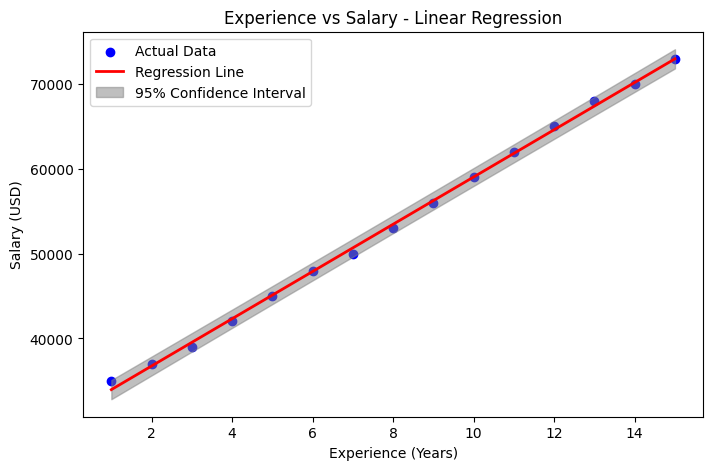


 INTERPRETATION:
- The SLOPE is POSITIVE (2785.71), meaning salary increases with experience.
- R² of 0.999 indicates the model explains about 99.9% of salary variation.
- The shaded area in the plot shows the 95% CONFIDENCE INTERVAL of predicted salaries.


In [15]:
# ------------------------------------------------------------
# Linear Regression with Confidence Intervals
# ------------------------------------------------------------

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from google.colab import files

# Step 2: Upload Excel file
print(" Please upload your Experience_Salary.xlsx file")
uploaded = files.upload()

# Step 3: Load dataset into DataFrame
data = pd.read_excel("Experience_Salary.xlsx")

# Step 4: Display all rows
pd.set_option('display.max_rows', None)
print("\n Full Dataset Preview:")
print(data)

# Step 5: Define independent and dependent variables
X = data[['Experience_Years']]
y = data['Salary_USD']

# Step 6: Linear Regression using sklearn
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Step 7: Compute R²
r2 = r2_score(y, y_pred)

# Step 8: Confidence Interval using statsmodels
X_sm = sm.add_constant(X)  # Add constant for intercept
sm_model = sm.OLS(y, X_sm).fit()
pred_summary = sm_model.get_prediction(X_sm).summary_frame(alpha=0.05)  # 95% CI

# Step 9: Combine results
result = data.copy()
result['Predicted'] = y_pred
result['Lower_CI'] = pred_summary['obs_ci_lower']  # Lower bound of CI
result['Upper_CI'] = pred_summary['obs_ci_upper']  # Upper bound of CI
print("\n Result with Predictions and Confidence Intervals:")
print(result.head())

# Step 10: Display model parameters
print("\n Regression Equation:")
print(f"Intercept (a): {model.intercept_:.2f}")
print(f"Slope (b): {model.coef_[0]:.2f}")
print(f"R² Score: {r2:.3f}")

# Step 11: Plot regression with confidence intervals
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.fill_between(X['Experience_Years'], result['Lower_CI'], result['Upper_CI'], color='gray', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (USD)')
plt.title('Experience vs Salary - Linear Regression')
plt.legend()
plt.show()

# Step 12: Interpretation
print("\n INTERPRETATION:")
print(f"- The SLOPE is POSITIVE ({model.coef_[0]:.2f}), meaning salary increases with experience.")
print(f"- R² of {r2:.3f} indicates the model explains about {r2*100:.1f}% of salary variation.")
print("- The shaded area in the plot shows the 95% CONFIDENCE INTERVAL of predicted salaries.")
